# Analyzing the Data

## Step 1: Import Libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
import pickle
%matplotlib inline
import seaborn as sns

## Step 2: Read in the Data from the Pickle

In [166]:
# Read in the data
with open('data/clean_df.pickle','rb') as read_file:
    clean_df = pickle.load(read_file)

In [167]:
station_traffic = clean_df.groupby('station').total_traffic.sum()
top_10_stations = station_traffic.sort_values(ascending=False)[0:11]
print('The 10 stations with the most foot traffic during the sampled weeks are')
print(top_10_stations)

The 10 stations with the most foot traffic during the sampled weeks are
station
34 ST-PENN STA     16439860.0
23 ST              12165809.0
GRD CNTRL-42 ST    10714137.0
FULTON ST          10582561.0
34 ST-HERALD SQ    10286919.0
TIMES SQ-42 ST      9859007.0
125 ST              9544006.0
42 ST-PORT AUTH     9510106.0
86 ST               9223703.0
CANAL ST            8269081.0
59 ST               7797561.0
Name: total_traffic, dtype: float64


In [168]:
# First look at all stations at all times of day on all days
# Not helpful in making recommendations
general_station_groups = clean_df.groupby('station').total_traffic.sum().sort_values(ascending=False)
general_station_groups[0:10]

station
34 ST-PENN STA     16439860.0
23 ST              12165809.0
GRD CNTRL-42 ST    10714137.0
FULTON ST          10582561.0
34 ST-HERALD SQ    10286919.0
TIMES SQ-42 ST      9859007.0
125 ST              9544006.0
42 ST-PORT AUTH     9510106.0
86 ST               9223703.0
CANAL ST            8269081.0
Name: total_traffic, dtype: float64

In [169]:
# See which stations are most trafficked on weekday mornings

am_weekday_df = clean_df[np.logical_and(clean_df.weekday<=4,np.logical_and(clean_df.hour<=12,clean_df.hour>=9))]

am_weekday_stations = pd.DataFrame(am_weekday_df.groupby('station').exit_counts.agg(np.median).sort_values(ascending=False))
top_am_weekday_stations = am_weekday_stations[0:51]

In [171]:
top_am_weekday_stations

,exit_counts
station,
THIRTY THIRD ST,540.0
42 ST-BRYANT PK,500.5
WESTCHESTER SQ,478.0
GRAND ST,476.0
68ST-HUNTER CO,415.0
72 ST-2 AVE,414.0
51 ST,414.0
PATH WTC 2,384.0
33 ST-RAWSON ST,384.0


In [170]:
# Save most trafficked morning stations
with open('data/top_am_weekday_stations.pickle', 'wb') as to_write:
    pickle.dump(top_am_weekday_stations, to_write)

# sns.barplot(am_weekday_stations[am_weekday_stations>600].values,am_weekday_stations[am_weekday_stations>600].index,color='lightblue')
# plt.xlabel('Station')
# sns.despine();

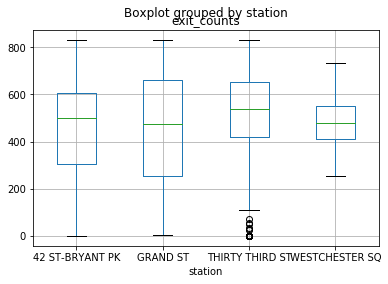

In [150]:
# Create boxplots for the stations with the highest medians
am_weekday_df[np.logical_or(np.logical_or(am_weekday_df.station=='THIRTY THIRD ST',am_weekday_df.station=='42 ST-BRYANT PK'),\
                            np.logical_or(am_weekday_df.station=='WESTCHESTER SQ',am_weekday_df.station=='GRAND ST'))].boxplot('exit_counts',by='station');


In [162]:
# See which stations are most trafficked on weekday evenings
pm_weekday_df = clean_df[np.logical_and(clean_df.weekday<=4,np.logical_and(clean_df.hour>=12+6,clean_df.hour<=12+9))]

pm_weekday_stations = pd.DataFrame(pm_weekday_df.groupby('station').exit_counts.agg(np.median)).sort_values('exit_counts',ascending=False)
top_pm_weekday_stations = pm_weekday_stations[0:51]

In [163]:
# Save most trafficked morning stations
with open('data/top_pm_weekday_stations.pickle', 'wb') as to_write:
    pickle.dump(top_pm_weekday_stations, to_write)

    
# sns.barplot(am_weekday_stations[am_weekday_stations>600].values,am_weekday_stations[am_weekday_stations>600].index,color='lightblue')
# plt.xlabel('Station')
# sns.despine();

In [164]:
top_pm_weekday_stations.head()

,exit_counts
station,
CRESCENT ST,692.0
CLASSON AV,675.5
NEWKIRK PLAZA,621.0
FLUSHING-MAIN,585.5
PRESIDENT ST,572.0


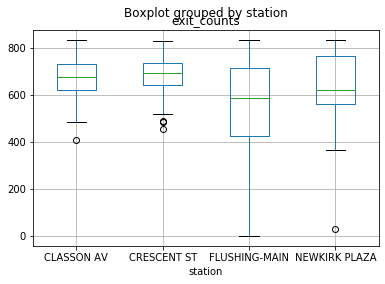

In [155]:
# Create boxplots for the stations with the highest medians
pm_weekday_df[np.logical_or(np.logical_or(pm_weekday_df.station=='CRESCENT ST',pm_weekday_df.station=='CLASSON AV'),\
                            np.logical_or(pm_weekday_df.station=='NEWKIRK PLAZA',pm_weekday_df.station=='FLUSHING-MAIN'))].boxplot('exit_counts',by='station');
